In [62]:
set(0,'defaultAxesFontSize',20)
set(0,'defaultLineLineWidth',5)

Notes adapted from 06-623 Course Notes (John Kitchin, F18)


# Function extrema



It is pretty common to need to find extreme values of a function in engineering analysis. An extreme value is often a maximum or minimum in a function, and we seek them when we want to maximize a profit function, or minimize a cost function, identify a maximum safe operating condition, etc.

Let's consider an example function with a graphical solution approach. We want a quantitative estimate of the minimum in this function. Example: $$y=x^2+exp(-5x^2)$$



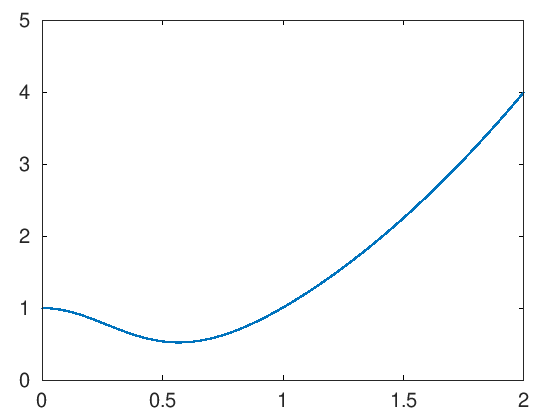

In [64]:
function y=f(x)
    y=x.^2 + exp(-5 * x.^2);
end

x = linspace(0, 2);
y = f(x);
plot(x, y)

You can see there is a minimum near 0.6. We can find the minimum in a crude kind of way by finding the index of the minimum value in the y-array, and then getting the corresponding value of the x-array. You control the accuracy of this answer by the number of points you discretize the function over.



In [65]:
min(y)

ans =  0.52190


In [67]:
[C, I] = min(y)

C =  0.52190
I =  29


In [68]:
x = linspace(0, 2, 500);
y = f(x);
[C,I] = min(y)
x(I)
y(I)

C =  0.52190
I =  143
ans =  0.56914
ans =  0.52190


Second example: $$y=sin(x)+\frac{1}{2}x$$

C = 0
I =  1


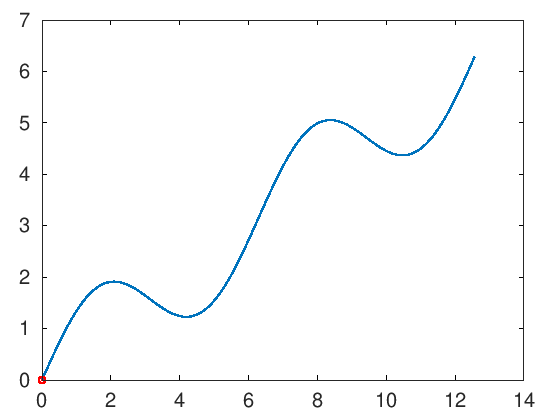

In [69]:
x1 = linspace(0, 4 * pi,200);
y1 = sin(x1) + 0.5 * x1;

[C,I] = min(y1)

plot(x1, y1)
hold all;
plot(x1(I), y1(I), 'ro')

What are the pros and cons of this method:

Pros:

1.  It is *easy*.
2.  You *see* the whole domain you are looking at, and it is easy to see how many extrema their are

Cons:

1.  *Lot's* of function evaluations. Imagine if it took a long time to compute each value.
2.  Somewhat tedious.
3.  Not so easy to reproduce
4.  Not scalable to large problems, your time to do this becomes a limiting factor.
5. Finds actual minimum, not necessarily where f'(x) = 0.




## Find the derivative, and solve for where it is zero



We can also derive the first derivative:

$y' = 2 * x + e^{-5 x^2} (-10 * x)$

and solve it for zero using fsolve.



In [77]:
function y=yp(x)
    y=2*x + exp(-5 * x.^2) * (-10 * x);
end

fsolve(@yp,0.6)

ans =  0.56735


These two answer agree to 5 decimal places.

This depends on your ability to correctly derive and implement the derivative. It is good to know you can solve this problem by more than one method. Here, we use a numerical derivative in the function instead to check our derivative. You can check the convergence of the derivative by varying the dx.



In [75]:
gradient(@f,0.3, dx=1e-6)

ans = -1.3129


In [76]:
pkg load optim

function y=ypd(x)
    y=deriv(@f, x, dx=1e-6);
end

[x,fval] = fsolve(@ypd, 0.4)

x =  0.56735
fval = -0.0000000084377


These look the same within tolerance. This is not a beautiful solution, but it is hard to argue with success here!



# Method of steepest descent

To use the steepest descent method to get the minimum, we use an iterative approach with:

$x_{n+1} = x_n - \alpha y'(x_n)$.

where $\alpha$ is a constant that we can adjust or we guess automatically. We have to derive these formulas if you want to use analytical derivatives:

$y' = 2 * x + e^{-5 x^2} (-10 * x)$

x0 =  0.70000
f0 =  0.57629
yp =  0.79594
x0 =  0.62041
f0 =  0.53085
yp =  0.33535
x0 =  0.58687
f0 =  0.52311
yp =  0.12504
x0 =  0.57437
f0 =  0.52205
yp =  0.045091
x0 =  0.56986
f0 =  0.52191
yp =  0.016122
x0 =  0.56824
f0 =  0.52189
yp =  0.0057503
x0 =  0.56767
f0 =  0.52189
yp =  0.0020493
x0 =  0.56746
f0 =  0.52189
yp =  0.00073012
x0 =  0.56739
f0 =  0.52189
yp =  0.00026010
x0 =  0.56737
f0 =  0.52189
yp =  0.000092656
x0 =  0.56736
f0 =  0.52189
yp =  0.000033007
x0 =  0.56735
f0 =  0.52189
yp =  0.000011758
x0 =  0.56735
f0 =  0.52189
yp =  0.0000041884
x0 =  0.56735
f0 =  0.52189
yp =  0.0000014920
x0 =  0.56735
f0 =  0.52189
yp =  0.00000053149
x0 =  0.56735
f0 =  0.52189
xnew =  0.56735
fnew =  0.52189
yp =  0.00000053149
i =  15


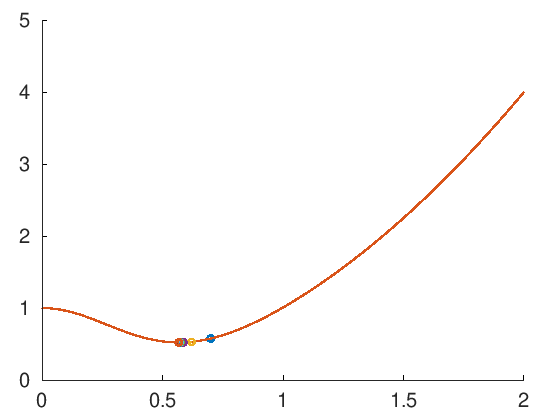

In [89]:

x0 = 0.7
f0 = f(x0)


hold all
plot(x0,f0,'o')
x = linspace(0, 2);
y = f(x);
plot(x, y)

for i = 1:20
    yp = 2.*x0+exp(-5.*x0^2.)*(-10.0*x0)  # y'
    x0 = x0 - 0.1*yp
    f0 = f(x0)

    if abs(yp) <= 1e-6
        break
    end
%     x0 = xnew
%     f0 = fnew
    
    plot(x0,f0,'o')
end


xnew, fnew, yp, i


## Newton-Raphson method of minima finding



To use the Newton-Raphson method to get the minimum, we use an iterative approach with:

$x_{n+1} = x_n - \frac{y'(x_n)}{y''(x_n)}$.

We have to derive these formulas if you want to use analytical derivatives:

$y' = 2 * x + e^{-5 x^2} (-10 * x)$

$y'' = 2 + e^{-5 x^2} (-10 * x)^2 - 10 e^{-5 x^2}$




x0 =  2
f0 =  4.0000
yp =  4.0000
ypp =  2.0000
xnew =  0.00000082446
fnew =  1.00000
x0 =  0.00000082446
f0 =  1.00000
yp = -0.0000065957
ypp = -8.0000
xnew =   -7.0052e-18
fnew =  1
x0 =   -7.0052e-18
f0 =  1
yp =    5.6041e-17
ypp = -8
xnew = 0
fnew =  1
xnew = 0
fnew =  1
yp =    5.6041e-17
i =  3


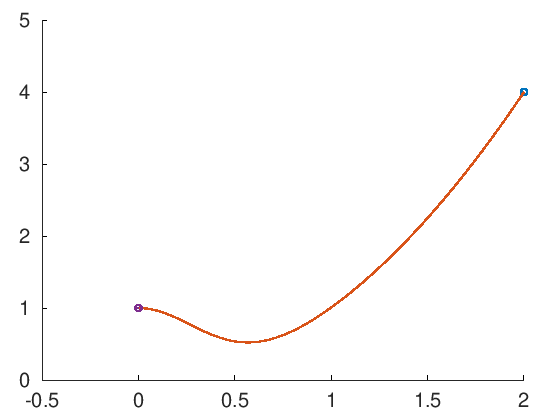

In [90]:

x0 = 2.0
f0 = f(x0)
hold all
plot(x0,f0,'o')
x = linspace(0, 2);
y = f(x);
plot(x, y)

for i = 1:15
    yp = 2.*x0+exp(-5.*x0^2.)*(-10.0*x0)  # y'
    ypp = 2.0+exp(-5.0*x0^2.)*(-10.0*x0)^2.0-10.0*exp(-5.0*x0^2.0) # y''
    xnew = x0 - yp / ypp

    fnew = f(xnew)

    if abs(yp) <= 1e-6
        break
    end
    x0 = xnew
    f0 = fnew
    
    plot(xnew,fnew,'o')
end


xnew, fnew, yp, i

Alternatively, we can estimate the derivatives numerically. This has the downside of numerical instability for dx that is too small, or low accuracy if it is too large, and the need to check if you made a good choice for it. On the plus side, it avoids making mistakes in the derivative derivation and implementation.


x0 =  0.60000
f0 =  0.52530
yp =  0.20821
ypp =  6.2979
xnew =  0.56694
fnew =  0.52189
x0 =  0.56694
f0 =  0.52189
yp = -0.0026482
ypp =  6.4387
xnew =  0.56735
fnew =  0.52189
x0 =  0.56735
f0 =  0.52189
yp = -0.00000019718
ypp =  6.4377
xnew =  0.56735
fnew =  0.52189
xnew =  0.56735
fnew =  0.52189
yp = -0.00000019718
i =  3


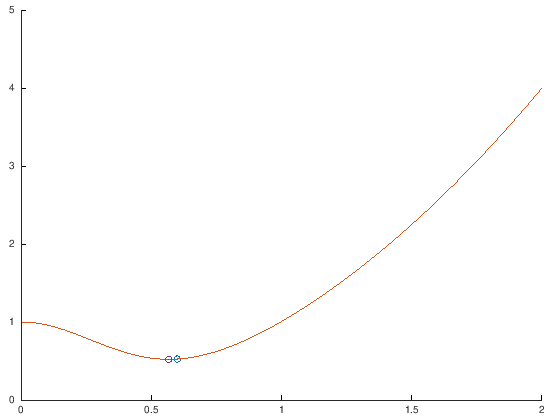

In [51]:
pkg load optim

x0 = 0.6
f0 = f(x0)

hold all
plot(x0,f0,'o')
x = linspace(0, 2);
y = f(x);
plot(x, y)

for i = 1:15
    yp = deriv(@f, x0, 1e-6, 2, 1)  # y'
    ypp = deriv(@f, x0, 1e-6, 2, 2) # y''
    xnew = x0 - yp / ypp
    fnew = f(xnew)

    if abs(yp) <= 1e-6
        break
    end
    
    x0 = xnew
    f0 = fnew
    
    plot(xnew,fnew,'o')

end


xnew, fnew, yp, i

This answer also agrees to at least 5 decimal places. This is the gist of what happens in fsolve.

As we have seen many times, finding minima is such a common task that there are dedicated functions available for doing it. One of the is `fminsearch`. This has a similar signature as `fsolve`, you give it a function and an initial guess, and it iteratively searches for a minimum.




# fminsearch



Here is the basic use of fmin. As always, we should plot the answer where feasible to make sure it is the minimum we wanted.



In [91]:
function f=f(x)
    f=x.^2 + exp(-5 * x.^2);
end

guess = 0.5
[x,fval,exitflag,output] = fminsearch(@f, guess)

guess =  0.50000
x =  0.56732
fval =  0.52189
exitflag =  1
output =

  scalar structure containing the fields:

    iterations =  15
    funcCount =  38
    algorithm = Nelder-Mead simplex direct search
    message = Simplex size 6.1035e-05 <= 1.0000e-04 and step in function value 3.6152e-10 <= 1.0000e-07...quitting




In [92]:
output

output =

  scalar structure containing the fields:

    iterations =  15
    funcCount =  38
    algorithm = Nelder-Mead simplex direct search
    message = Simplex size 6.1035e-05 <= 1.0000e-04 and step in function value 3.6152e-10 <= 1.0000e-07...quitting




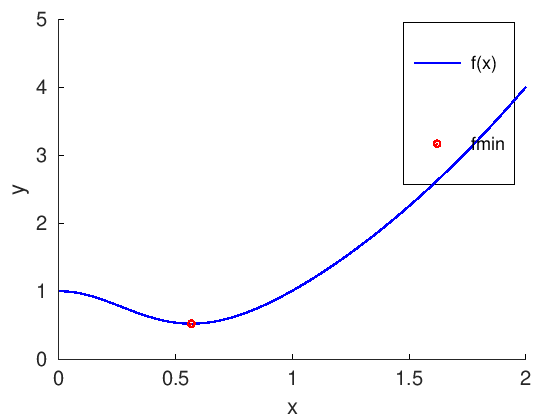

In [93]:
xrange = linspace(0, 2);
y = f(xrange);

hold all;
plot(xrange, y, 'b-')
plot(x, fval, 'ro')
xlabel('x')
ylabel('y')
legend('f(x)', 'fmin')

Note this answer is only the same in the first 4 decimal places. Remember that these iterative approaches stop when a tolerance is met. Check the defaults on fmin!




## Multiple minima



It is possible for functions to have more than one minimum. In this case, your guess will determine which minimum is found. Here is an example where there is a minimum near 2.2, and one near 4.5.



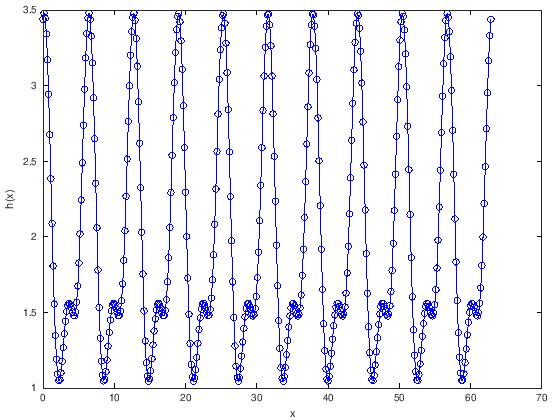

In [55]:
function h=h(x)
    h= 2 + cos(x) + cos(2*x - 0.5) / 2;
end

x = linspace(0, 20 * pi, 400);

plot(x, h(x), 'bo-')
xlabel('x')
ylabel('h(x)')

This guess finds the one near 2.2:



In [94]:
fminsearch(@h, 2)

ans =  2.2611


and this guess finds the one near 4.5



In [106]:
fminsearch(@h, 3.8)

ans =  2.2610


In [95]:
fminsearch(@h, 4)

ans =  8.5444


You have to decide which one is better for the problem at hand. If this were a cost function, the one at the lower cost is probably better! Note that all we can say here is which one is lower in the interval we are looking at. By inspection of the function, you can see it will be periodic, so there will be many other minima that also exist.




## Finding maxima



`minimize` is for finding *minima*. We can use it to find maxima though, but finding the *minima* of $-f(x)$. You can see here that when we plot $-h(x)$ the minima become maxima, and vice-versa. Now you can see there are two definite minima, one near zero, and one near 3.5, which correspond to the maxima of $h(x)$.



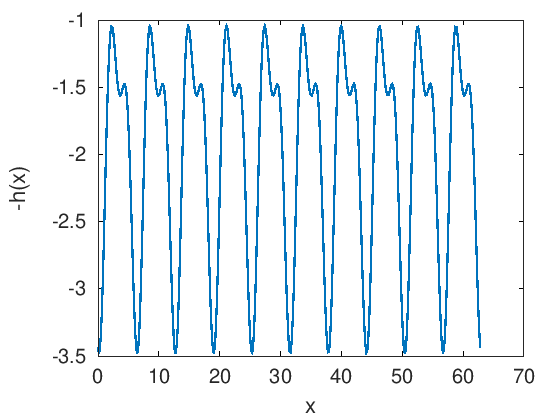

In [110]:

x = linspace(0, 20 * pi, 400);

plot(x, -h(x))
xlabel('x')
ylabel('-h(x)')

Here is an example to find the maximum near 3.5.



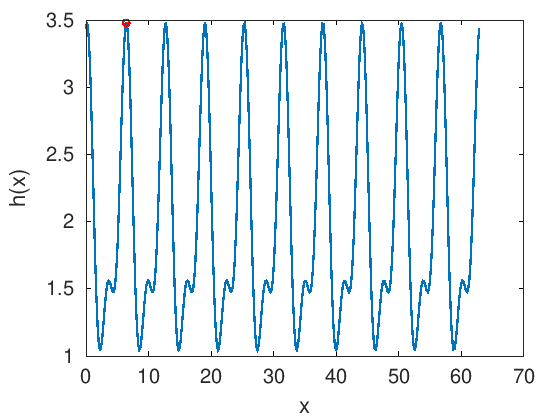

In [111]:
function h=h(x)
    h=(2 + cos(x) + cos(2*x - 0.5) / 2);
end

function h=mh(x)
    h=-h(x);
end

[xmin,fval] = fminsearch(@mh, 3.5);  
h(xmin);

plot(x, h(x))
hold all;
plot(xmin, h(xmin), 'ro')
xlabel('x')
ylabel('h(x)')

Once again, here you have to decide which maximum is relevant



# Shooting method example

L =  200
H =  200


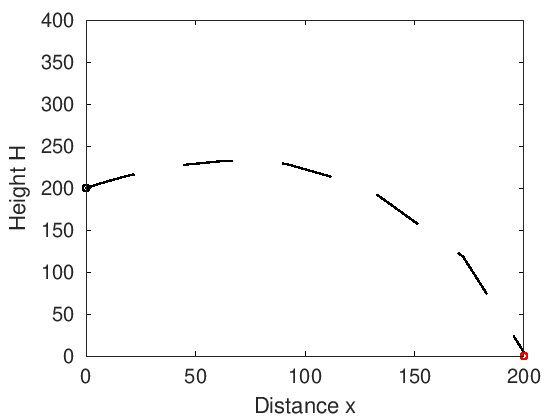

In [112]:
function yprime = cannonball(t, y)
    g=9.8; #m/s^2
    gamma=0.1;
    yprime = [y(3);
            y(4);
            -gamma*y(3);
            -gamma*y(4)-g];
end

L=200
H=200

sol = ode45(@cannonball,[0,L],[0,H,32,27.5]);
plot(sol.y(1,:),sol.y(2,:),'--k')
xlim([0,L])
ylim([0,H*2])
hold all
plot(0,H,'ok')
plot(L,0,'or')
xlabel('Distance x')
ylabel('Height H')

v0 =

    23.130   105.547



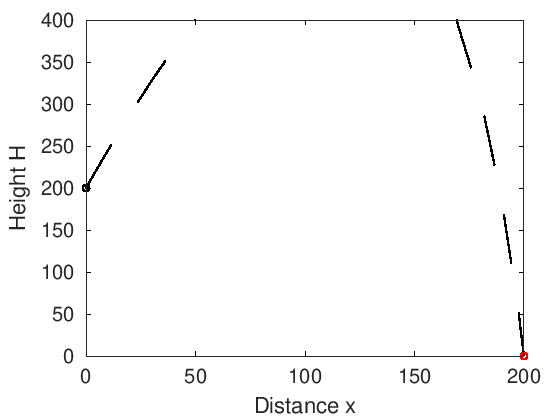

In [116]:
function yprime = cannonball(t, y)
    g=9.8; #m/s^2
    gamma=0.1;
    yprime = [y(3);
            y(4);
            -gamma*y(3);
            -gamma*y(4)-g];
end

function error_out = shooting_method(x)
    L=200;
    H=200;
    vx0=x(1);
    vz0=x(2);
    
    #Solve the ODE
    sol = ode45(@cannonball,linspace(0,20,200),[0,H,vx0,vz0]);
    
    #Find the closest point the cannonball gets to the target
    # and return the deviation from that.
%     error_out=min((sol.y(2,:)-0).^2+
%                     (sol.y(1,:)-200).^2);
    error_out=(sol.y(2,end)-0).^2+(sol.y(1,end)-200).^2;
end

#Optimize this shooting method to find the best initial conditions
v0 = fminsearch(@shooting_method,[5,40])

#With the optimized parameters, integrate so we can see the final solution
sol = ode45(@cannonball,linspace(0,20,200),[0,H,v0(1),v0(2)]);

#Plot the solution
plot(sol.y(1,:),sol.y(2,:),'--k')
xlim([0,L])
ylim([0,H*2])
hold all
plot(0,H,'ok')
plot(L,0,'or')
xlabel('Distance x')
ylabel('Height H')


# Summary



Today we introduced the concept of finding minima/maxima in functions. This is an iterative process, much like finding the roots of a nonlinear function. You can think of it as finding the zeros of the derivative of a nonlinear function! This method is the root of many important optimization problems including regression.

`scipy.optimize.minimize` is the preferred function for doing minimization. There are other more specific ones described at [https://docs.scipy.org/doc/scipy/reference/optimize.html](https://docs.scipy.org/doc/scipy/reference/optimize.html), but `minimize` has a more consistent interface and provides almost all the functionality of those other methods.

Next time, we will look at how to apply minimization to regression problems.

